In [2]:
import pandas as pd #Data analysis
import numpy as np #Data analysis
import matplotlib.pyplot as plt #Data visualization
import seaborn as sns #Data visualization
from sklearn.model_selection import train_test_split #Model Selection
from sklearn.linear_model import LogisticRegression #Logistic Regression
from sklearn.metrics import accuracy_score, confusion_matrix, log_loss  #Evaluation 
from sklearn.neural_network import MLPClassifier #Multilayer Perceptron

Fontconfig error: Cannot load default config file: No such file: (null)


In [3]:
#Importing and categorizing data
df = pd.read_csv('Airlines.csv')
dataset = df[["Airline","DayOfWeek", "Time", "Length", "Delay"]]
delayed = df[df['Delay']==1]
not_delayed = df[df['Delay']==0]

In [4]:
df.sample(5) #5 Random samples from the data

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
57914,57915,B6,372,FLL,LGA,6,585,165,0
314407,314408,XE,2540,BNA,IAH,7,520,134,0
480541,480542,AA,349,FLL,DFW,2,950,195,1
341783,341784,XE,2465,IAH,MAF,1,1003,89,0
32898,32899,WN,46,DAL,ABQ,4,1130,110,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539383 entries, 0 to 539382
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           539383 non-null  int64 
 1   Airline      539383 non-null  object
 2   Flight       539383 non-null  int64 
 3   AirportFrom  539383 non-null  object
 4   AirportTo    539383 non-null  object
 5   DayOfWeek    539383 non-null  int64 
 6   Time         539383 non-null  int64 
 7   Length       539383 non-null  int64 
 8   Delay        539383 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 37.0+ MB


In [6]:
df.describe()

,id,Flight,DayOfWeek,Time,Length,Delay
count,539383.00000,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000
mean,269692.00000,2427.928630,3.929668,802.728963,132.202007,0.445442
std,155706.60446,2067.429837,1.914664,278.045911,70.117016,0.497015
min,1.00000,1.000000,1.000000,10.000000,0.000000,0.000000
25%,134846.50000,712.000000,2.000000,565.000000,81.000000,0.000000
50%,269692.00000,1809.000000,4.000000,795.000000,115.000000,0.000000
75%,404537.50000,3745.000000,5.000000,1035.000000,162.000000,1.000000
max,539383.00000,7814.000000,7.000000,1439.000000,655.000000,1.000000


In [7]:
df.corr() #Correlation matrix

,id,Flight,DayOfWeek,Time,Length,Delay
id,1.000000,-0.006156,-0.055474,0.029156,0.020781,0.139762
Flight,-0.006156,1.000000,0.000416,-0.005750,-0.341481,-0.046175
DayOfWeek,-0.055474,0.000416,1.000000,0.001273,0.013397,-0.026199
Time,0.029156,-0.005750,0.001273,1.000000,-0.020612,0.150454
Length,0.020781,-0.341481,0.013397,-0.020612,1.000000,0.040489
Delay,0.139762,-0.046175,-0.026199,0.150454,0.040489,1.000000


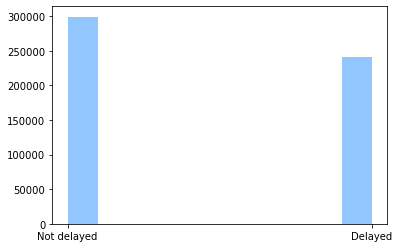

In [8]:
#Number of occurances
plt.style.use("seaborn-pastel")
ax = plt.subplot() 
plt.hist(df["Delay"])
plt.xticks([0,1])
ax.set_xticklabels(["Not delayed", "Delayed"])
plt.show()

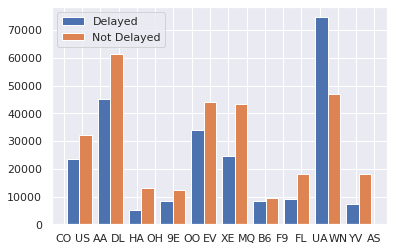

In [9]:
#Histogram of delays in different airports
sns.set(style="darkgrid")
plt.figure()
plt.hist([delayed['Airline'], not_delayed['Airline']])
plt.legend(["Delayed", "Not Delayed"])
plt.show()

In [10]:
#Dummy variables for the airline column
dataset_new = dataset.join(pd.get_dummies(data=dataset['Airline'])).drop(columns=["Airline"])
print("Shape of the new dataset: ", dataset_new.shape)
dataset_new.head(2)

Shape of the new dataset:  (539383, 22)


,DayOfWeek,Time,Length,Delay,9E,AA,AS,B6,CO,DL,...,FL,HA,MQ,OH,OO,UA,US,WN,XE,YV
0,3,15,205,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,3,15,222,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [11]:
#Train-test split
features = dataset_new.drop(columns = ["Delay"])
label = dataset_new['Delay']
x_train, x_val_test, y_train, y_val_test = train_test_split(features, label, test_size=0.2)
x_val, x_test, y_val, y_test = train_test_split(x_val_test, y_val_test, test_size=0.5)

In [13]:
print("Size of the training dataset: ", x_train.shape[0])
print("Size of the validation dataset: ", x_val.shape[0])
print("Size of the test dataset: ", x_test.shape[0])

Size of the training dataset:  431506
Size of the validation dataset:  53938
Size of the test dataset:  53939


In [20]:
#Logistic Regresssion model
lr = LogisticRegression(max_iter=200)
lr.fit(x_train, y_train)

In [53]:
y_val_pred_lr = lr.predict(x_val)
y_train_pred_lr = lr.predict(x_train)
y_test_pred_lr = lr.predict(x_test)

test_acc_lr = accuracy_score(y_test, y_test_pred_lr)
train_err_lr = log_loss(y_train, y_train_pred_lr)
val_err_lr =  log_loss(y_val, y_val_pred_lr)
val_acc_lr = accuracy_score(y_val, y_val_pred_lr)

print("Training error of the Linear Regression model: ", train_err_lr)
print("Validation error of the Linear Regression model: ", val_err_lr)
print("Validation accuracy of the Linear Regression model: ", val_acc_lr)

Training error of the Linear Regression model:  12.738603411771278
Validation error of the Linear Regression model:  12.735860942723999
Validation accuracy of the Linear Regression model:  0.6312618191256628


In [30]:
#MLP
MLP = MLPClassifier(hidden_layer_sizes=(128),max_iter=150).fit(x_train, y_train)

y_val_pred_MLP = MLP.predict(x_val)
val_acc_MLP = accuracy_score(y_val, y_val_pred_MLP)

In [50]:
y_train_pred_MLP = MLP.predict(x_train)
y_test_pred_MLP = MLP.predict(x_test)
y_val_pred_MLP = MLP.predict(x_val)

test_acc_MLP = accuracy_score(y_test, y_test_pred_MLP)
train_err_mlp = log_loss(y_train, y_train_pred_MLP)
val_err_mlp =  log_loss(y_val, y_val_pred_MLP)
val_acc_MLP = accuracy_score(y_val, y_val_pred_MLP)

print("Training error of the MLP model: ", train_err_mlp)
print("Validation error of the MLP model: ", val_err_mlp)
print("Validation accuracy of the MLP model: ", val_acc_MLP)

Training error of the MLP model:  12.474301055034783
Validation error of the MLP model:  12.44962481675761
Validation accuracy of the MLP model:  0.6395491119433424


In [54]:
test_err_MLP = log_loss(y_test, y_test_pred_MLP)
test_acc_MLP = accuracy_score(y_test, y_test_pred_MLP)

print("Testing error of the MLP model: ", test_err_MLP)
print("Testing accuracy of the MLP model: ", test_acc_MLP)


Testing error of the MLP model:  12.277143183403153
Testing accuracy of the MLP model:  0.6445429095830475
